<h3> Importing Required Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

<p> Setting the max_columns to none and the float format to two decimal places for clarity while viewing the data</p>

In [4]:
#importing the data into dataframe df
df = pd.read_csv('../Clean Data/autoinsurance_churn_cleaned.csv')

<p>Taking a glimpse at the data to make sure the data is imported correctly</p>

In [5]:
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,221300017872.00,521300005982.00,818.88,1454.00,2018-12-09,44,1978-06-23,32.58,-96.31,Kaufman,TX,Kaufman,22500.00,1,15.00,Married,50000 - 74999,1,1,1,NaN,0
1,221300134410.00,521300051115.00,974.20,1795.00,2018-01-02,72,1950-05-30,32.73,-97.00,Grand Prairie,TX,Dallas,27500.00,0,2.00,Single,50000 - 74999,1,0,0,NaN,0
2,221300673028.00,521300247929.00,967.38,4818.00,2009-09-23,55,1967-07-07,32.82,-96.85,Dallas,TX,Dallas,42500.00,0,10.00,Married,75000 - 99999,1,0,0,NaN,0
3,221301573419.00,521300570147.00,992.41,130.00,2022-07-25,53,1969-05-25,32.68,-97.16,Arlington,TX,Tarrant,125000.00,1,6.00,Married,175000 - 199999,1,0,1,2021-12-22,1
4,221301622347.00,521300588399.00,784.63,5896.00,2006-10-11,50,1972-09-25,32.75,-97.38,Fort Worth,TX,Tarrant,87500.00,1,4.00,Married,225000 - 249999,1,1,1,NaN,0


<h3>Splitting the dataset into Churned and Non-Churned Customers</h3>

<p> We are going to split the combined dataset into <b>Churned</b> and <b>Non-churned</b> customers, so it is easy to compare between the two classes</p>

In [6]:
# Churned customers (Churn == 1)
df_churned = df[df['Churn'] == 1].copy()

# Non-churned customers (Churn == 0)
df_nonchurned = df[df['Churn'] == 0].copy()

<p> Let us check the number of Churned and Non-churned customers.</p>

In [7]:
print(f"Churned customers: {df_churned.shape[0]}")
print(f"Non-churned customers: {df_nonchurned.shape[0]}")

Churned customers: 192003
Non-churned customers: 1476839


Let's check what the churn rate is

In [8]:
print(f"Churn Rate: {df_churned.shape[0] / df.shape[0]:.2%}")

Churn Rate: 11.51%


<h3>Ages Distribution comparision between Churned and Non-churned customers</h3>

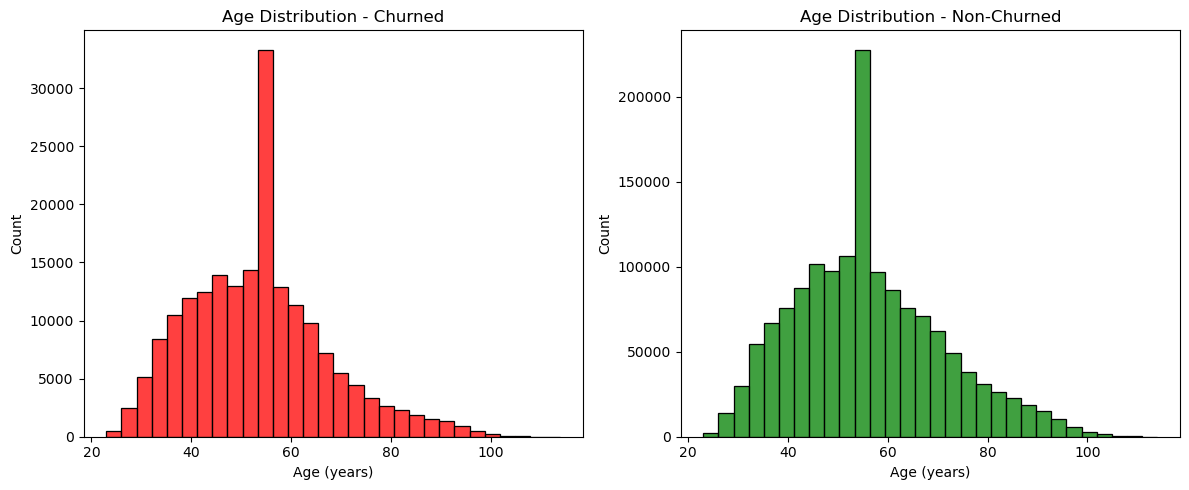

In [9]:
bins = np.linspace(df['age_in_years'].min(), df['age_in_years'].max(), 31)  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for churned customers
sns.histplot(df_churned['age_in_years'], bins=bins, color='red', ax=axes[0])
axes[0].set_title('Age Distribution - Churned')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Count')

# Histogram for non-churned customers
sns.histplot(df_nonchurned['age_in_years'], bins=bins, color='green', ax=axes[1])
axes[1].set_title('Age Distribution - Non-Churned')
axes[1].set_xlabel('Age (years)')

# Histogram for All customers
# sns.histplot(df['age_in_years'], bins=bins, color='blue', ax=axes[2])
# axes[2].set_title('Age Distribution')
# axes[2].set_xlabel('Age (years)')
# axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

<p>It looks like the distributions are very similar and we can see it spike up at 55 years.</p>
<p>Since both of the distributions spiked up at the 55 year mark, it is certain that the original dataframe consists of 55 year olds as the vast majority.</p>
<p>Let us confirm the speculation by visualizing the original dataframe and make sure the distribution has a huge spike at 55 years.</p>

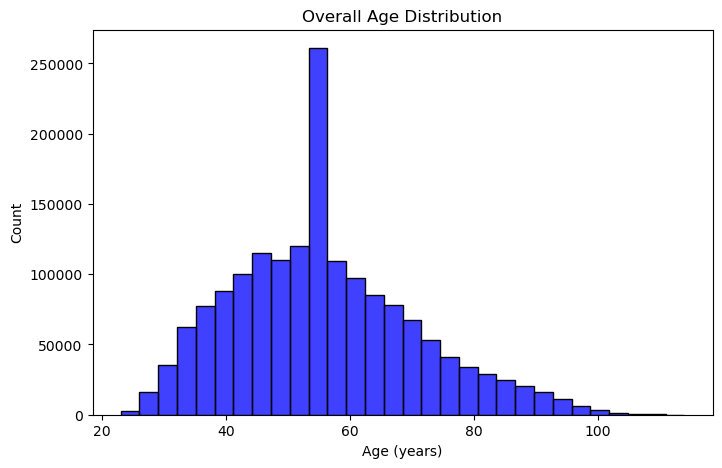

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age_in_years'], bins=30, color='blue')
plt.title('Overall Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

<p>It is sure that by the above three visualizations, the age distributions are identical in both the Churned and Non-churned distributions. Hence, we can say that <b>Age is not a good factor in predicting Churn</b></p>

<h3>Income Distribution Comparision between Churned and Non-churned customers</h3>

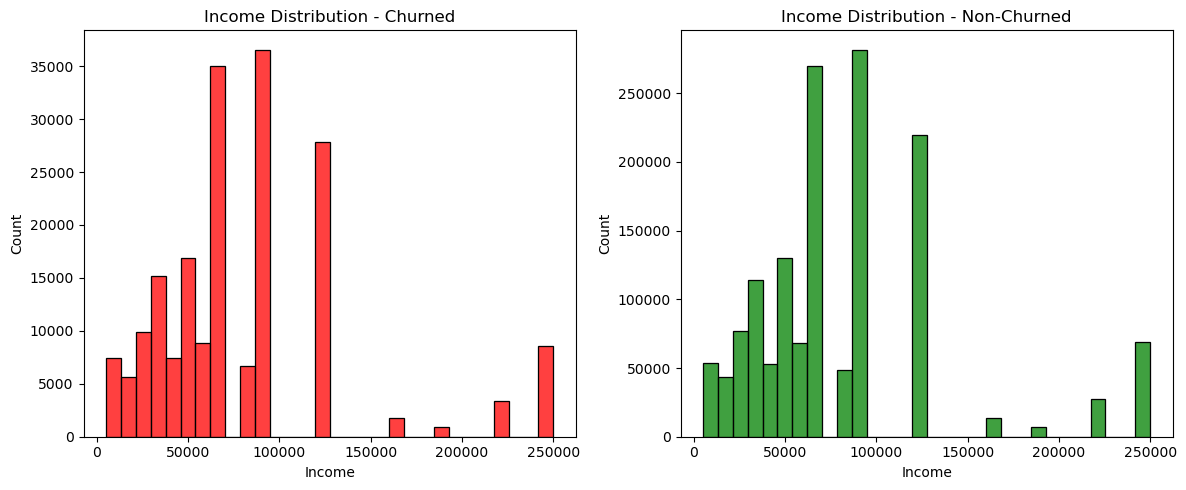

In [11]:
bins = np.linspace(df['income'].min(), df['income'].max(), 31)  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for churned customers
sns.histplot(df_churned['income'], bins=bins, color='red', ax=axes[0])
axes[0].set_title('Income Distribution - Churned')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Count')

# Histogram for non-churned customers
sns.histplot(df_nonchurned['income'], bins=bins, color='green', ax=axes[1])
axes[1].set_title('Income Distribution - Non-Churned')
axes[1].set_xlabel('Income')


plt.tight_layout()
plt.show()

<p>Both the distributions have peaks at 87500, 125000 and 70000 and other bars are also very identical</p>

<p>Similar to the distribution we have seen for the age column, the <b>income distribution</b> is also identical for both the Churned and Non-Churned customers. Hence, <b>we can conclude that Income is not a good factor for predicting churn</b></p>

<h3>Average Annual Amount Charged Distribution</h3>

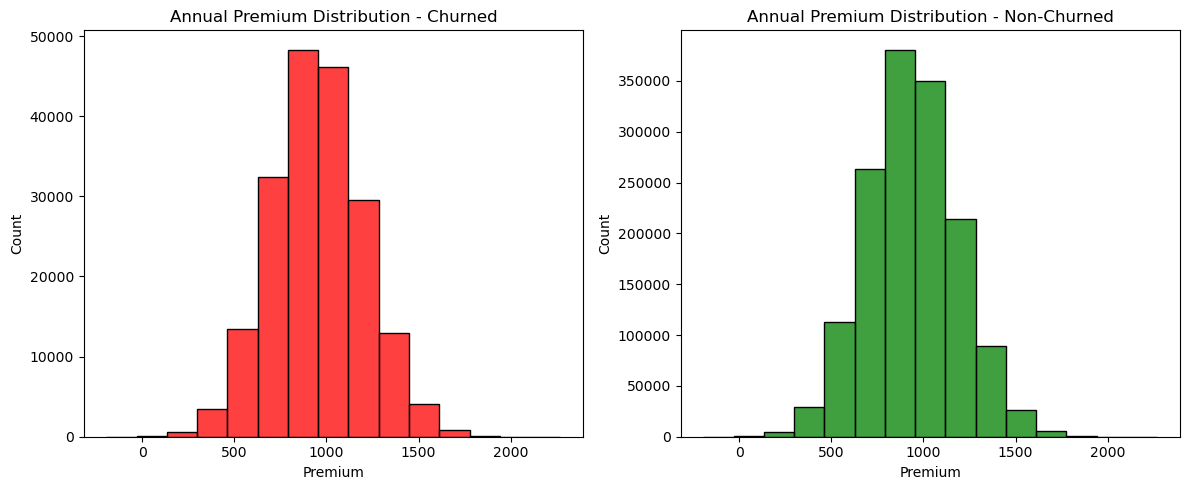

In [12]:
bins = np.linspace(df['curr_ann_amt'].min(), df['curr_ann_amt'].max(), 16)  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for churned customers
sns.histplot(df_churned['curr_ann_amt'], bins=bins, color='red', ax=axes[0])
axes[0].set_title('Annual Premium Distribution - Churned')
axes[0].set_xlabel('Premium')
axes[0].set_ylabel('Count')

# Histogram for non-churned customers
sns.histplot(df_nonchurned['curr_ann_amt'], bins=bins, color='green', ax=axes[1])
axes[1].set_title('Annual Premium Distribution - Non-Churned')
axes[1].set_xlabel('Premium')


plt.tight_layout()
plt.show()

It looks like the distributions for the Insurance Premium for the Churned and Non-churned customers is identical and we can say that the <b>Annual Insurance Premium is also not a good predictor for the churn</b></p>

<h3>Days Tenure for the Insurance Distribution</h3>

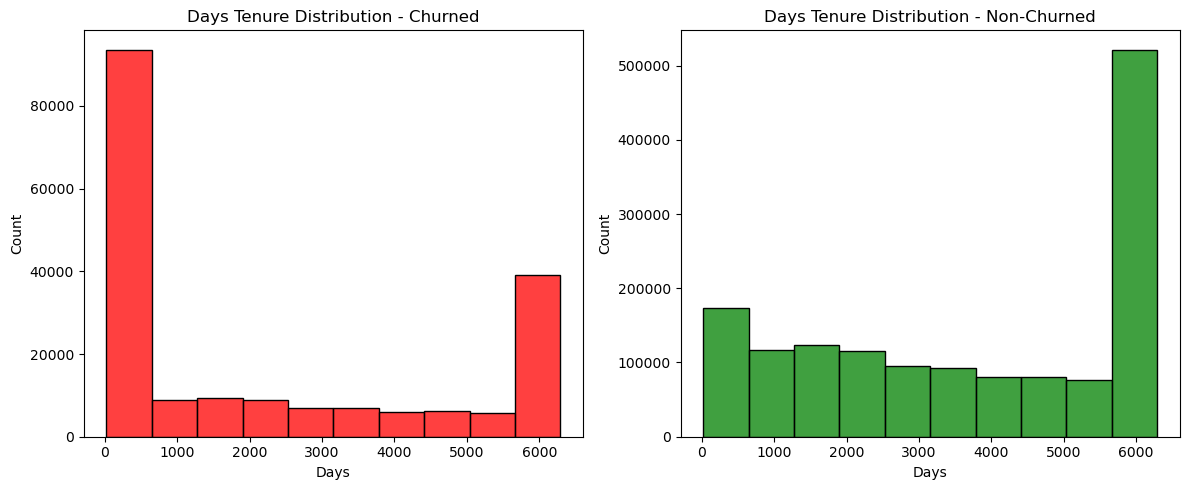

In [13]:
bins = np.linspace(df['days_tenure'].min(), df['days_tenure'].max(), 11)  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for churned customers
sns.histplot(df_churned['days_tenure'], bins=bins, color='red', ax=axes[0])
axes[0].set_title('Days Tenure Distribution - Churned')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Count')

# Histogram for non-churned customers
sns.histplot(df_nonchurned['days_tenure'], bins=bins, color='green', ax=axes[1])
axes[1].set_title('Days Tenure Distribution - Non-Churned')
axes[1].set_xlabel('Days')


plt.tight_layout()
plt.show()

From the Churned distribution, we can infer that most of the churned customers, close to the 90000 of the 192k churned customers i.e., <b>almost 50% churned within the first 600 days of first taking the insurance.</b>

We can also see that the long time <b>customers which have been with the insurance for atleast 5400 days are the 2nd highest to churn</b>, which is close to over 20 percent of the total churn rate.

While <b>most of the Non-churned customers belong to the long time loyal customers almost contributing to one third of our current customers</b>, while two thirds is of the customers that are with the insurance from 0 to 5400 days.

Based on the two distributions, we can say that the days_tenure is a useful variable to predict the customer churn.

We can further analyze the days_tenure column other variables to check if we can uncover any hidden patterns.

We are going to segment the days_tenure values into 4 different tenure segments and then visualize them to gain a better understanding based on our segmented values.

In [14]:
tenure_bins = [20, 365, 1800, 3650, 6291]
tenure_labels = ['<1 year', '1-5 years', '5-10 years', '10+ years']

# Assign tenure segments to both dataframes
df['tenure_segment'] = pd.cut(
    df['days_tenure'], bins=tenure_bins, labels=tenure_labels, right=True, include_lowest=True)
df_churned['tenure_segment'] = pd.cut(
    df_churned['days_tenure'], bins=tenure_bins, labels=tenure_labels, right=True, include_lowest=True)
df_nonchurned['tenure_segment'] = pd.cut(
    df_nonchurned['days_tenure'], bins=tenure_bins, labels=tenure_labels, right=True, include_lowest=True)

In [15]:
# Count churned and non-churned customers per tenure segment
churned_counts = df_churned['tenure_segment'].value_counts().sort_index()
nonchurned_counts = df_nonchurned['tenure_segment'].value_counts().sort_index()

# Combine into a DataFrame for plotting
tenure_counts = pd.DataFrame({
    'Churned': churned_counts,
    'Non-Churned': nonchurned_counts
})

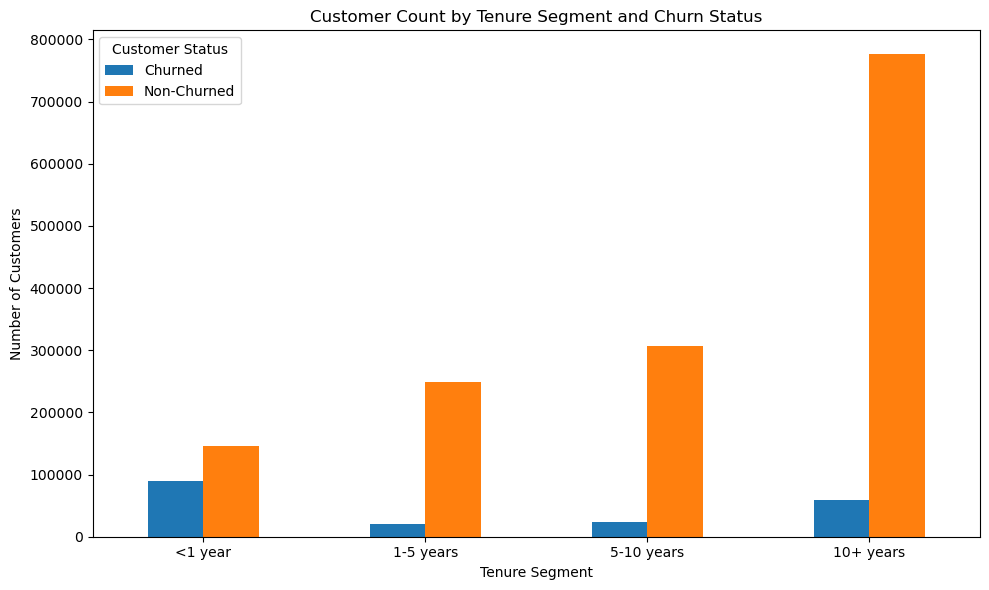

In [16]:
tenure_counts.plot(kind='bar', figsize=(10,6))
plt.title('Customer Count by Tenure Segment and Churn Status')
plt.xlabel('Tenure Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()

As we can see from the bar chart, customers with less than one year tenure have a significantly higher chance of churning than the ones staying beyond a year.

<h3>Home Market Value Analysis</h3>

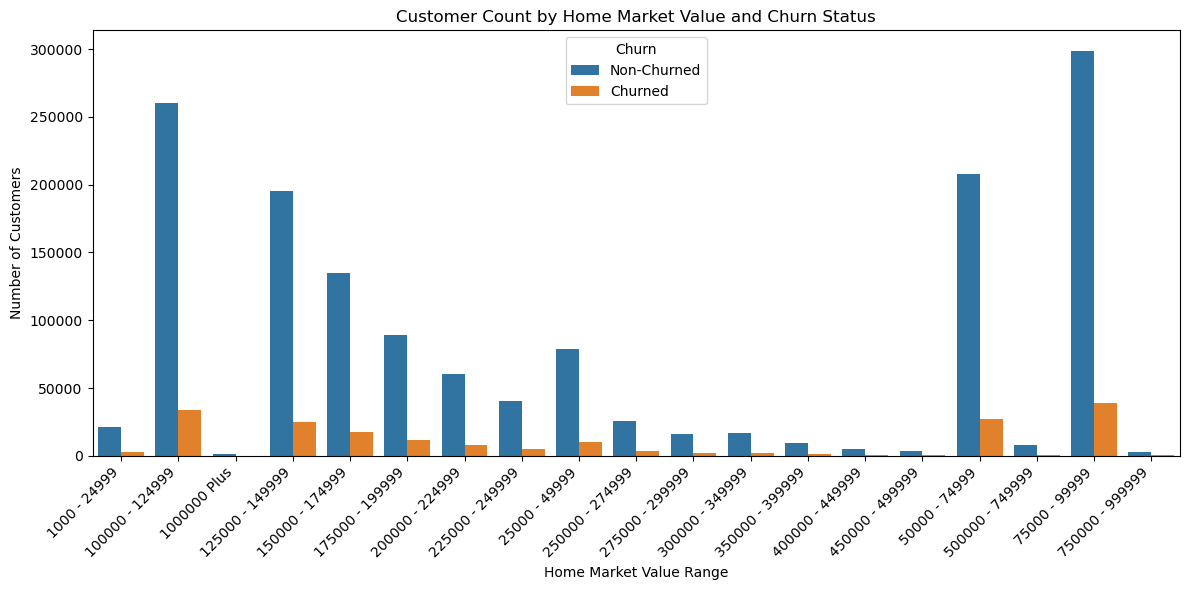

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='home_market_value',     
    hue='Churn',               
    order=sorted(df['home_market_value'].unique()) 
)
plt.title('Customer Count by Home Market Value and Churn Status')
plt.xlabel('Home Market Value Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.tight_layout()
plt.show()

From the graph we can see that there are no house prices, whose residents have a higher churn rate. All the churn rates for their respective house prices are normal and would not need any further investigation.

<h3>Analyzing churn rates by County and City</h3>

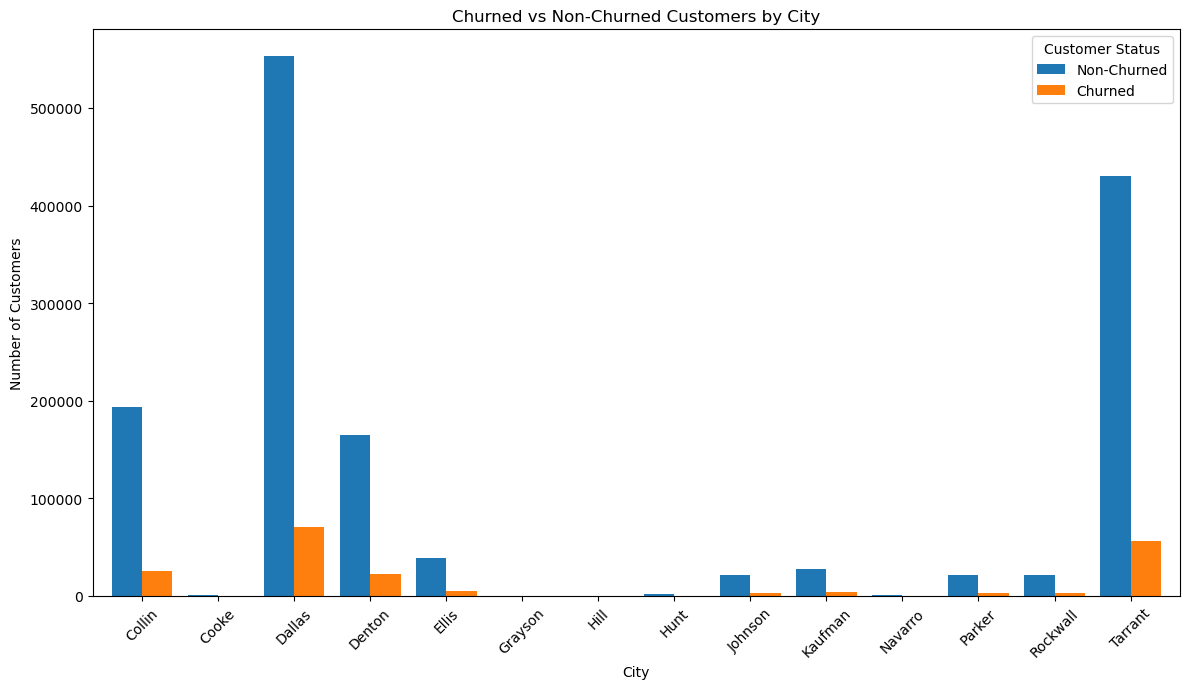

In [18]:
churn_city_counts = df.groupby(['county', 'Churn']).size().unstack(fill_value=0)

churn_city_counts.columns = ['Non-Churned', 'Churned'] if 0 in churn_city_counts.columns else churn_city_counts.columns

ax = churn_city_counts.plot(kind='bar', figsize=(12, 7), width=0.8)
ax.set_title('Churned vs Non-Churned Customers by City')
ax.set_xlabel('City')
ax.set_ylabel('Number of Customers')
ax.legend(title='Customer Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It looks like the churn rates for the Counties are low to normal. Let us look into the cities for a deeper understanding of the locations and churn rates

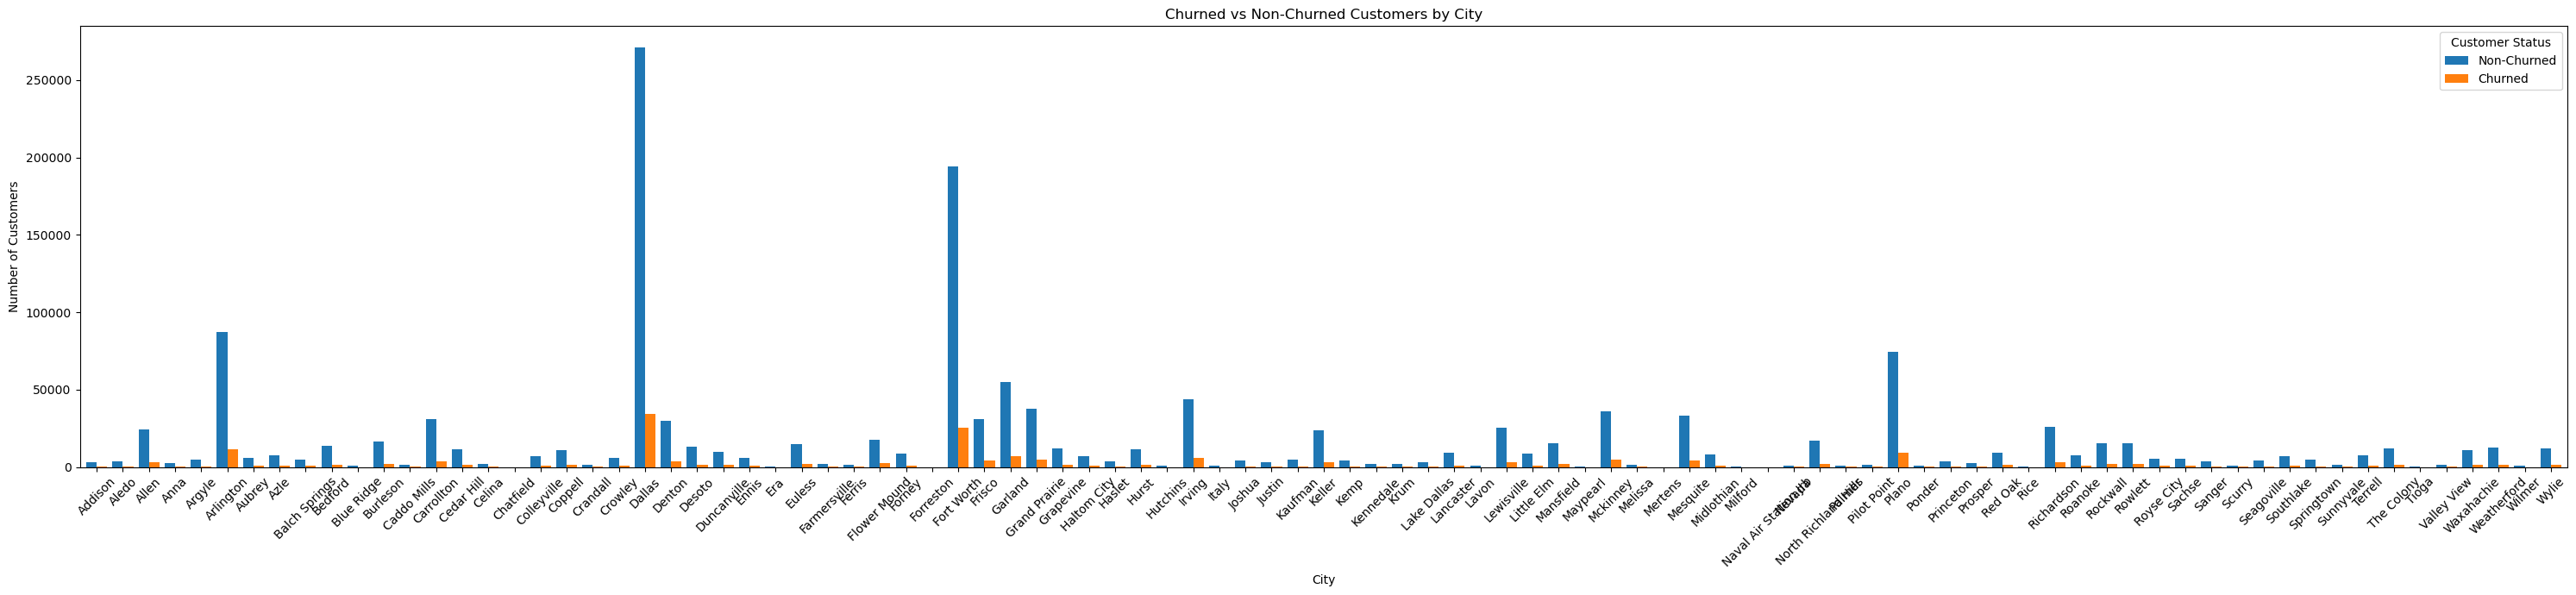

In [19]:
churn_city_counts = df.groupby(['city', 'Churn']).size().unstack(fill_value=0)

churn_city_counts.columns = ['Non-Churned', 'Churned'] if 0 in churn_city_counts.columns else churn_city_counts.columns

ax = churn_city_counts.plot(kind='bar', figsize=(30, 7), width=0.8)
ax.set_title('Churned vs Non-Churned Customers by City')
ax.set_xlabel('City')
ax.set_ylabel('Number of Customers')
ax.legend(title='Customer Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Upon close observation of the cities vs churn rates, the churn rates looks very normal. We can conclude that <b>there are no cities with significant churned customer percentage.</b>

<h3>Analyzing the Length of Residency</h3>

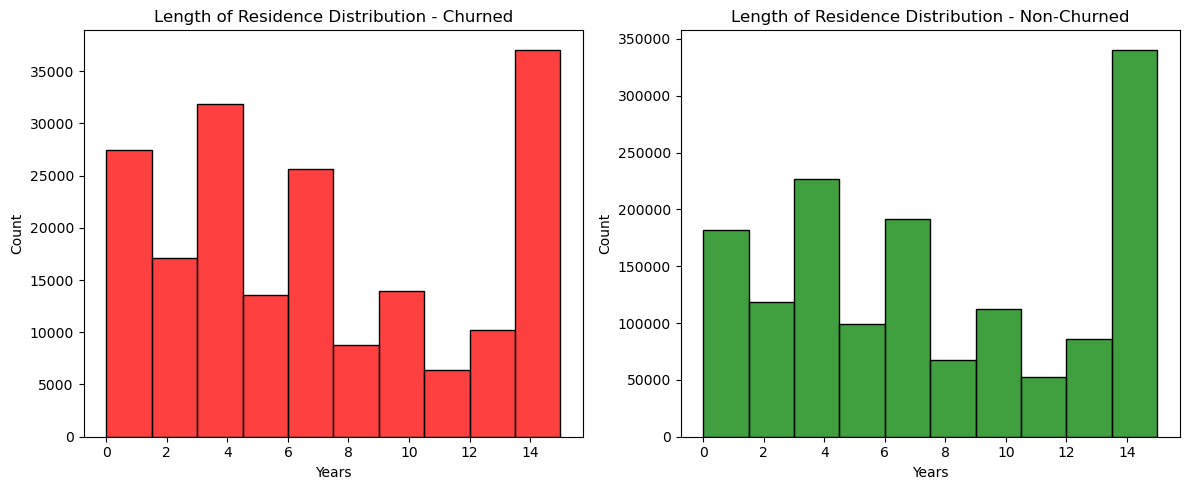

In [21]:
bins = np.linspace(df['length_of_residence'].min(), df['length_of_residence'].max(), 11)  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for churned customers
sns.histplot(df_churned['length_of_residence'], bins=bins, color='red', ax=axes[0])
axes[0].set_title('Length of Residence Distribution - Churned')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Count')

# Histogram for non-churned customers
sns.histplot(df_nonchurned['length_of_residence'], bins=bins, color='green', ax=axes[1])
axes[1].set_title('Length of Residence Distribution - Non-Churned')
axes[1].set_xlabel('Years')


plt.tight_layout()
plt.show()

It looks like the Lenght of Residence has identical distributions for the Churned and Non-Churned customers. We can conclude that the Length of Residence is also not a good indicator of predicting churn.

<h3>Binary Variables Analysis</h3>

<h3>Home Owner</h3>

In [23]:
df_churned['home_owner'].value_counts()

1    154969
0     37034
Name: home_owner, dtype: int64

In [24]:
df_nonchurned['home_owner'].value_counts()

1    1216425
0     260414
Name: home_owner, dtype: int64

In [25]:
df['home_owner'].value_counts()

1    1371394
0     297448
Name: home_owner, dtype: int64

The ratio of home-owners to renters in the churned data set is about <b>4.2</b>.

The ratio of home-owners to renters in the Non-churned data set is about <b>4.8</b>.

The ratio of home-owners to renters in the overall data set is about <b>4.6</b>.

From the observations above, we can say that althought the number of home-owners are almost 4 times greater than the number of renters, the ratio of the number of observations of home-owners to renters in the original dataframe is the same, hence <b>we can say that higher churn is not related to home-owners</b>.

<h3>College Degree</h3>

In [26]:
df_churned['college_degree'].value_counts()

0    128844
1     63159
Name: college_degree, dtype: int64

In [27]:
df_nonchurned['college_degree'].value_counts()

0    952686
1    524153
Name: college_degree, dtype: int64

In [28]:
df['college_degree'].value_counts()

0    1081530
1     587312
Name: college_degree, dtype: int64

By looking at the numbers from the churned dataframe, Non-churned dataframe and the original dataframe, we can say that the number of samples with a college degree are twice as much the samples without a college degree. This is evidently shown in both the Churned and Non-churned datasets. 

Hence thought the number of churned customers with college degree are double that of the Non-churned, it is just a result of bias in sampling.

<h3>Good Credit</h3>

In [29]:
df_churned['good_credit'].value_counts()

1    160877
0     31126
Name: good_credit, dtype: int64

In [30]:
df_nonchurned['good_credit'].value_counts()

1    1249487
0     227352
Name: good_credit, dtype: int64

In [31]:
df['good_credit'].value_counts()

1    1410364
0     258478
Name: good_credit, dtype: int64

The number of samples of bad credit are five times less than the number of samples of good credit, which is visibly evident across all the three dataframes. <b>Hence we can say there is no solid relation betweeen churn and good_Credit.</b>

<h3>Marital Status</h3>

In [32]:
df_churned['marital_status'].value_counts()

Married    118735
Single      73268
Name: marital_status, dtype: int64

In [33]:
df_nonchurned['marital_status'].value_counts()

Married    923402
Single     553437
Name: marital_status, dtype: int64

In [34]:
df['marital_status'].value_counts()

Married    1042137
Single      626705
Name: marital_status, dtype: int64

The number of Married samples are almost double the Single samples in number and that kind of ratio is seen across all the three dataframes. Hence we can say that Churn and Marital Status are not much correlated. 

In [35]:
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn,tenure_segment
0,221300017872.00,521300005982.00,818.88,1454.00,2018-12-09,44,1978-06-23,32.58,-96.31,Kaufman,TX,Kaufman,22500.00,1,15.00,Married,50000 - 74999,1,1,1,NaN,0,1-5 years
1,221300134410.00,521300051115.00,974.20,1795.00,2018-01-02,72,1950-05-30,32.73,-97.00,Grand Prairie,TX,Dallas,27500.00,0,2.00,Single,50000 - 74999,1,0,0,NaN,0,1-5 years
2,221300673028.00,521300247929.00,967.38,4818.00,2009-09-23,55,1967-07-07,32.82,-96.85,Dallas,TX,Dallas,42500.00,0,10.00,Married,75000 - 99999,1,0,0,NaN,0,10+ years
3,221301573419.00,521300570147.00,992.41,130.00,2022-07-25,53,1969-05-25,32.68,-97.16,Arlington,TX,Tarrant,125000.00,1,6.00,Married,175000 - 199999,1,0,1,2021-12-22,1,<1 year
4,221301622347.00,521300588399.00,784.63,5896.00,2006-10-11,50,1972-09-25,32.75,-97.38,Fort Worth,TX,Tarrant,87500.00,1,4.00,Married,225000 - 249999,1,1,1,NaN,0,10+ years


In [36]:
df['days_tenure'].max()

6291.0

<h3>Deeper Analysis of Tenure with other variables</h3>

Since <b>days_tenure</b> is the only variable which has shown considerable variability for Churned and Non-churned customers, we are going to explore this feature to uncover any hidden patterns.

First we will explore the days_tenure segments for the churned customers with the binary variables to check if we have anything that is going to indicate if any category is biased to churn.

<b>It should be noted that, there will be a bias in proportion because of difference in observations of each category in all the binary variables. </b>

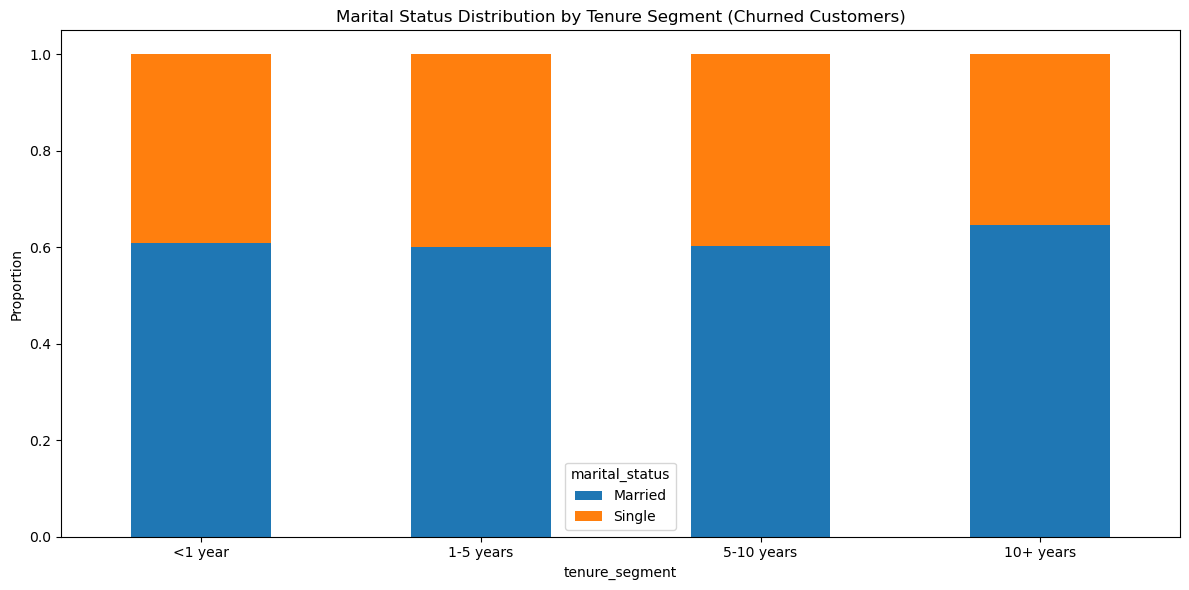

In [37]:
# Marital status distribution by tenure segment
cross_tab = pd.crosstab(
    index=df_churned['tenure_segment'],
    columns=df_churned['marital_status'],
    normalize='index'  # Convert to proportions
)

# Plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Marital Status Distribution by Tenure Segment (Churned Customers)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


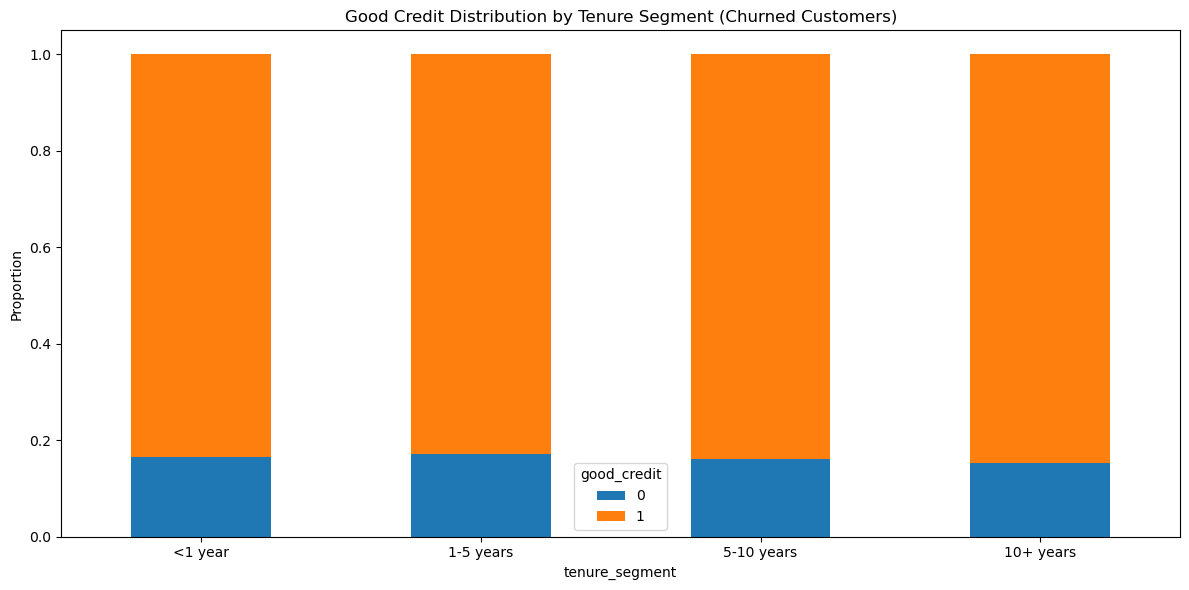

In [38]:
# Good Credit distribution by tenure segment
cross_tab = pd.crosstab(
    index=df_churned['tenure_segment'],
    columns=df_churned['good_credit'],
    normalize='index'  # Convert to proportions
)

# Plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Good Credit Distribution by Tenure Segment (Churned Customers)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


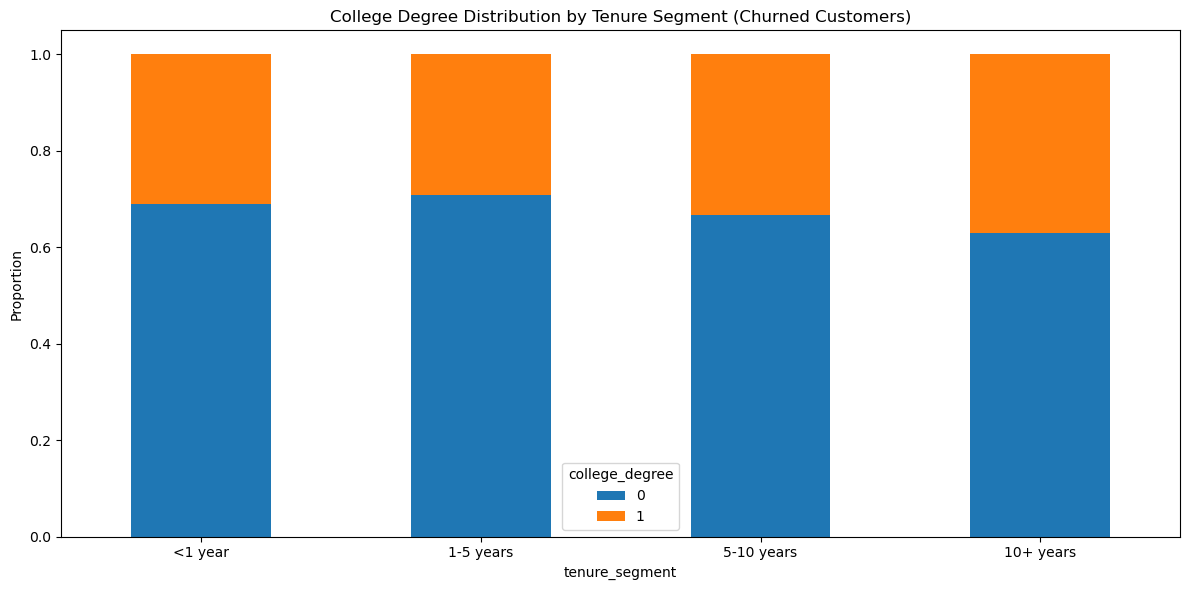

In [39]:
# College Degree distribution by tenure segment
cross_tab = pd.crosstab(
    index=df_churned['tenure_segment'],
    columns=df_churned['college_degree'],
    normalize='index'  # Convert to proportions
)

# Plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('College Degree Distribution by Tenure Segment (Churned Customers)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


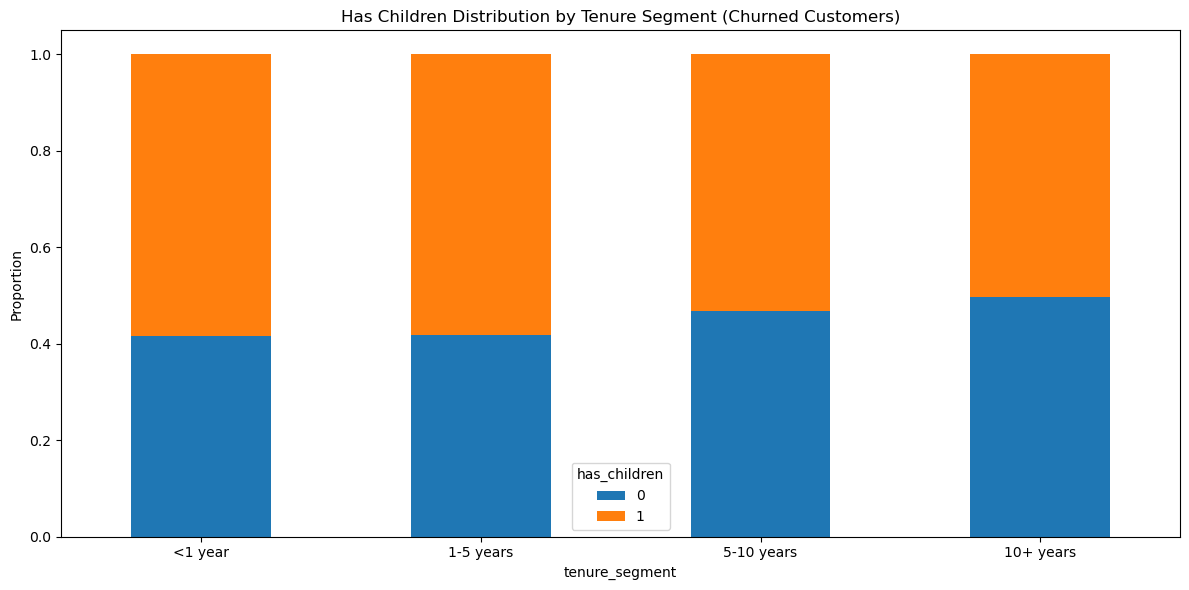

In [40]:
# Has Children distribution by tenure segment
cross_tab = pd.crosstab(
    index=df_churned['tenure_segment'],
    columns=df_churned['has_children'],
    normalize='index'  # Convert to proportions
)

# Plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Has Children Distribution by Tenure Segment (Churned Customers)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


We can observe that there is a minor difference in proportions in the college_degree and has_children binary columns, althouth the difference is not something that can help differentiate the customer churn.

<h3>Checking Statistical Significance for the Binary Variables with Churn</h3>

In [41]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['marital_status'], df['Churn'])

# Chi-square test
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: p-value for marital_status = {p_chi2:.10g}")


Chi-square test: p-value for marital_status = 5.490772132e-09


In [42]:
n = df.shape[0]
phi = np.sqrt(chi2 / n)
print(f"Phi coefficient: {phi:.3f}")

Phi coefficient: 0.005


In [43]:
# Create a contingency table
contingency_table = pd.crosstab(df['has_children'], df['Churn'])

# Chi-square test
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: p-value for has_children = {p_chi2:.10g}")


Chi-square test: p-value for has_children = 8.377021545e-166


In [44]:
n = df.shape[0]
phi = np.sqrt(chi2 / n)
print(f"Phi coefficient: {phi:.3f}")

Phi coefficient: 0.021


In [45]:
contingency_table = pd.crosstab(df['good_credit'], df['Churn'])

# Chi-square test
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: p-value for good_credit = {p_chi2:.10g}")


Chi-square test: p-value for good_credit = 1.383163142e-20


In [46]:
n = df.shape[0]
phi = np.sqrt(chi2 / n)
print(f"Phi coefficient: {phi:.3f}")

Phi coefficient: 0.007


In [47]:
contingency_table = pd.crosstab(df['home_owner'], df['Churn'])

# Chi-square test
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: p-value for home_owner = {p_chi2:.10g}")


Chi-square test: p-value for home_owner = 4.714359586e-71


In [48]:
n = df.shape[0]
phi = np.sqrt(chi2 / n)
print(f"Phi coefficient: {phi:.3f}")

Phi coefficient: 0.014


For all the binary variables, the significance values is <0.05 and hence we calculated the coefficent which is less than 0.1 for all the variables and therefore they have negligible association with Churn.

<h3>Check for correlation in all the Columns</h3>

Let us check if we have any more columns co-related to Churn columm that we might have not clearly observed in the visualizations.

In [57]:
df.corr()

,individual_id,address_id,curr_ann_amt,days_tenure,age_in_years,latitude,longitude,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
individual_id,1.00,0.99,-0.01,0.01,0.04,-0.02,-0.04,-0.03,-0.04,-0.02,0.04,0.02,-0.06,-0.00
address_id,0.99,1.00,-0.01,0.01,0.05,-0.02,-0.04,-0.04,-0.05,-0.02,0.04,0.03,-0.06,-0.00
curr_ann_amt,-0.01,-0.01,1.00,0.03,0.09,0.01,0.01,0.13,-0.03,0.18,0.11,0.09,0.05,0.02
days_tenure,0.01,0.01,0.03,1.00,0.30,-0.00,-0.00,0.02,-0.05,0.10,0.06,0.04,0.01,-0.21
age_in_years,0.04,0.05,0.09,0.30,1.00,-0.04,-0.01,-0.01,-0.20,0.29,0.13,0.06,0.02,-0.06
latitude,-0.02,-0.02,0.01,-0.00,-0.04,1.00,0.21,0.16,0.01,-0.10,0.02,0.05,0.08,0.00
longitude,-0.04,-0.04,0.01,-0.00,-0.01,0.21,1.00,0.06,-0.01,0.00,0.00,0.02,0.06,-0.00
income,-0.03,-0.04,0.13,0.02,-0.01,0.16,0.06,1.00,0.05,0.05,0.17,0.12,0.26,-0.01
has_children,-0.04,-0.05,-0.03,-0.05,-0.20,0.01,-0.01,0.05,1.00,-0.10,0.05,0.04,0.01,0.02
length_of_residence,-0.02,-0.02,0.18,0.10,0.29,-0.10,0.00,0.05,-0.10,1.00,0.36,0.03,0.05,-0.04


It looks like age_in_years and length_of_residence columns can be faint indicators of churn.

Lets dive a little deeper and see if we can make anything out of it.

In [61]:
age_by_tenure = df_churned.groupby('tenure_segment')['age_in_years'].agg(['mean', 'median', 'std', 'count'])
print(age_by_tenure)

                mean  median   std  count
tenure_segment                           
<1 year        50.80   52.00 11.73  89764
1-5 years      49.28   48.00 13.81  20713
5-10 years     53.15   54.00 14.39  23029
10+ years      59.53   57.00 14.24  58497


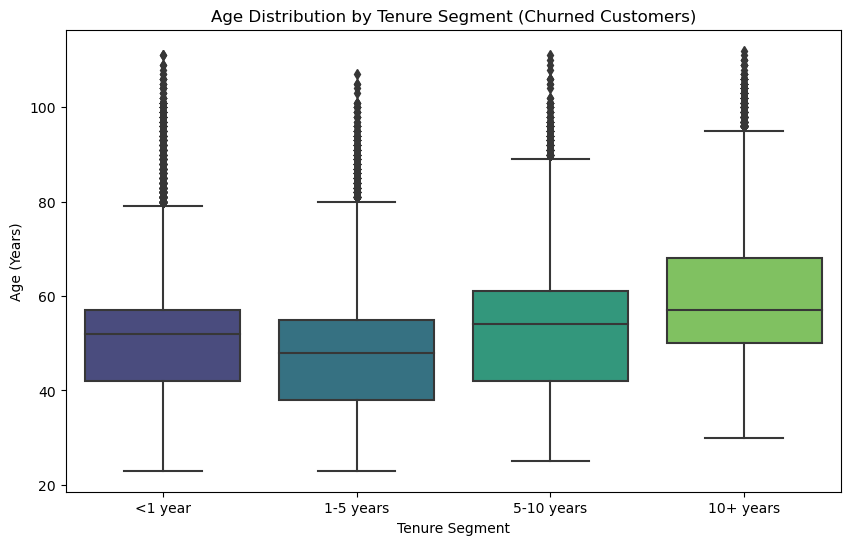

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_churned, 
    x='tenure_segment', 
    y='age_in_years', 
    palette='viridis'
)
plt.title('Age Distribution by Tenure Segment (Churned Customers)')
plt.xlabel('Tenure Segment')
plt.ylabel('Age (Years)')
plt.show()


Looks like the early churners mean age is around 51 years, with a comparitively low standard deviation of 11.7.

The mean age for churners from 1-5 years interestingly drops close to 49 years, but the standard deviation increases to 13.81.

The trend goes upwards for the mean age with the mean age for 10+ years being almost 60 with a high standard deviation of 12.2 

Let us further investigate the lenght_of_residents too to find more patterns and then come to conclusions.

In [69]:
length_of_residence = df_churned.groupby('tenure_segment')['length_of_residence'].agg(['mean', 'median', 'std', 'count'])
print(length_of_residence)

                mean  median  std  count
tenure_segment                          
<1 year         6.50    5.00 4.87  89764
1-5 years       6.34    5.00 4.90  20713
5-10 years      7.19    6.00 5.06  23029
10+ years       7.95    7.00 5.20  58497


We can observe the mean length_of_residence increases as the tenure increases, which indicates that the longer the a customer resided in the same place the higher the chance is they stay longer.